<a href="https://colab.research.google.com/github/Jahanavi-7/Python/blob/main/Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Path to the zip file
zip_path = '/content/voices.zip'

# Extract to /content/audio_data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/audio_data')

print("Extraction complete.")


Extraction complete.


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np


In [ ]:
import librosa

pathological_voices = []
normal_voices = []

for root, dirs, files in os.walk('/content/audio_data'):
    for file in files:
        file_path = os.path.join(root, file)
        audio, sr = librosa.load(file_path)

        # Categorize based on the folder name
        if 'pvoice' in root:
            pathological_voices.append((file, audio, sr))
        elif 'nvoice' in root:
            normal_voices.append((file, audio, sr))


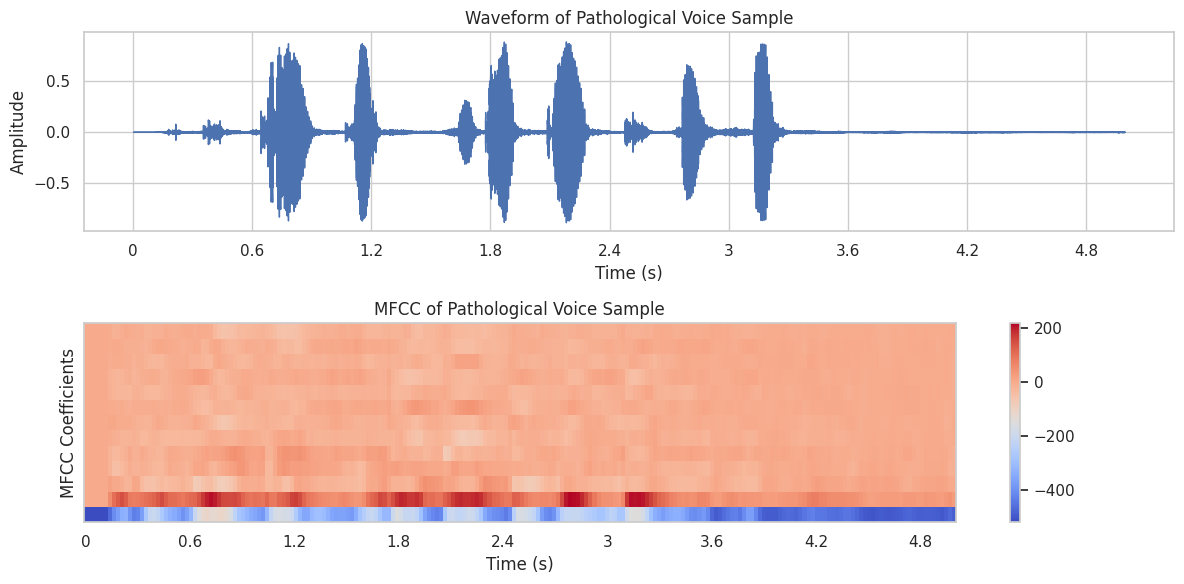

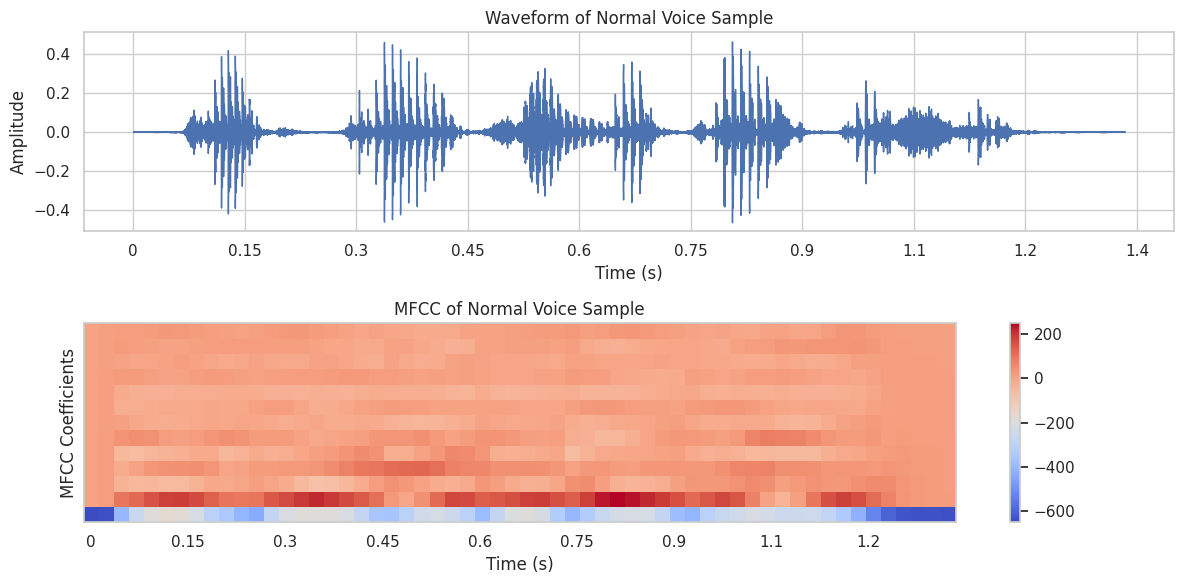

In [ ]:
def plot_waveform_and_mfcc(file_path, title="Audio Sample"):
    # Load the audio file
    audio, sr = librosa.load(file_path)

    # Plot the waveform
    plt.figure(figsize=(12, 6))

    # Waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform of {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.subplot(2, 1, 2)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC of {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.tight_layout()
    plt.show()

# Plot pathological voice sample
plot_waveform_and_mfcc(pvoice_sample, title="Pathological Voice Sample")

# Plot normal voice sample
plot_waveform_and_mfcc(nvoice_sample, title="Normal Voice Sample")


In [ ]:

import os
import numpy as np
import librosa

# Extract MFCC Features
def extract_mfcc_features(data_path, label):
    features = []
    labels = []

    for root, dirs, files in os.walk(data_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                audio, sr = librosa.load(file_path)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfccs_mean = np.mean(mfccs.T, axis=0)  # Average the MFCCs over time
                features.append(mfccs_mean)
                labels.append(label)
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

    print(f"Processed {len(features)} files from {data_path}")
    return np.array(features), np.array(labels)

In [ ]:
nvoice_path = '/content/audio_data/voices/nvoice'
pvoice_path = '/content/audio_data/voices/pvoice'


In [ ]:
import numpy as np

# Stack features and labels
X = np.vstack((normal_features, pathological_features))
y = np.hstack((normal_labels, pathological_labels))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 100.00%


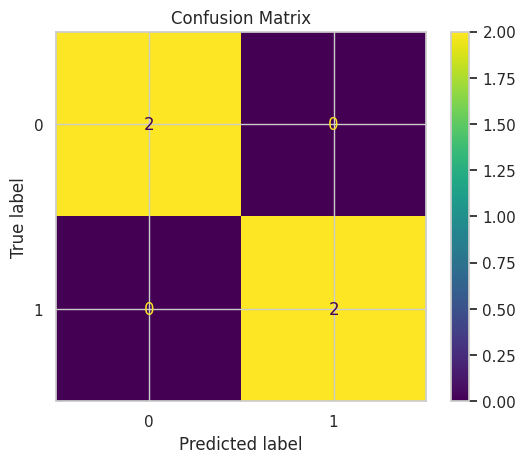

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Pathological"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         2
Pathological       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



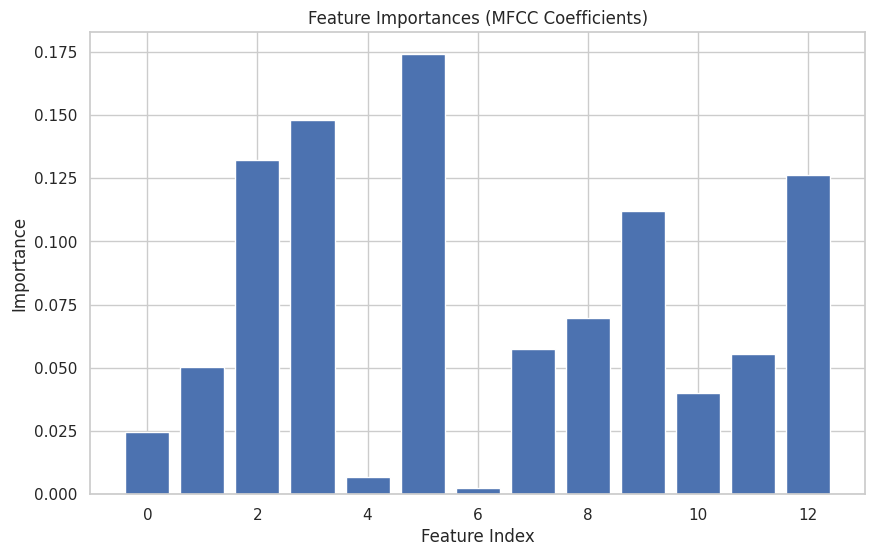

In [ ]:
import matplotlib.pyplot as plt

# Feature importances from the Random Forest model
importances = classifier.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importances (MFCC Coefficients)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


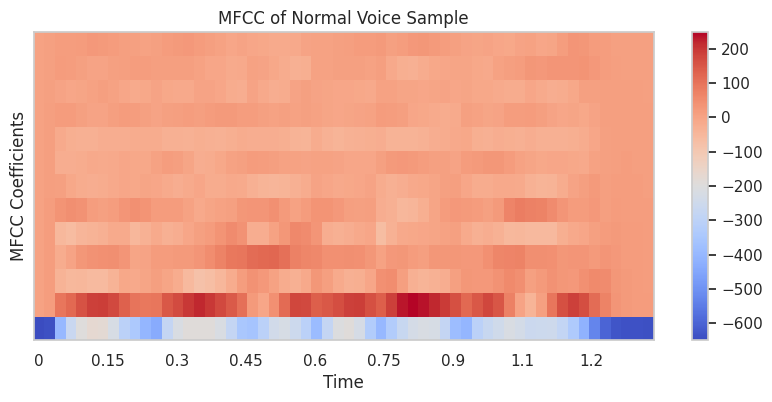

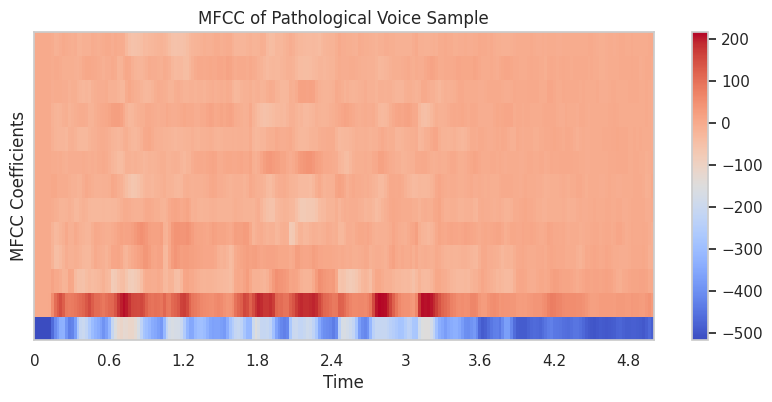

                0           1          2          3         4          5  \
Label                                                                      
0     -347.991089  132.078369   4.417537  49.556408  1.944227  18.232359   
1     -309.616180  113.490112 -25.718754  -1.412259  9.532295 -10.643555   

               6         7          8         9         10       11         12  
Label                                                                           
0      -9.700260  3.859952 -19.662891  6.616975  -5.635726  2.84137   5.731063  
1     -16.754801 -4.197642 -12.528193 -7.268832 -10.046205 -7.04000 -10.394094  


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Directories for normal and pathological voices
nvoice_dir = '/content/audio_data/voices/nvoice'
pvoice_dir = '/content/audio_data/voices/pvoice'

def extract_mfcc(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def plot_mfcc(mfccs, title="MFCC"):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC of {title}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()

# Analyze MFCCs for a sample normal and pathological voice
sample_normal_file = os.path.join(nvoice_dir, '1.wav')
sample_pathological_file = os.path.join(pvoice_dir, '1.wav')

# Plot MFCC for normal voice sample
normal_mfcc = extract_mfcc(sample_normal_file)
plot_mfcc(normal_mfcc, title="Normal Voice Sample")

# Plot MFCC for pathological voice sample
pathological_mfcc = extract_mfcc(sample_pathological_file)
plot_mfcc(pathological_mfcc, title="Pathological Voice Sample")

# Aggregate MFCC data for each file for further analysis
mfcc_data = []
labels = []

# Process all normal files
for filename in os.listdir(nvoice_dir):
    file_path = os.path.join(nvoice_dir, filename)
    mfccs = extract_mfcc(file_path)
    mean_mfcc = np.mean(mfccs, axis=1)
    mfcc_data.append(mean_mfcc)
    labels.append(0)  # Label 0 for normal voice

# Process all pathological files
for filename in os.listdir(pvoice_dir):
    file_path = os.path.join(pvoice_dir, filename)
    mfccs = extract_mfcc(file_path)
    mean_mfcc = np.mean(mfccs, axis=1)
    mfcc_data.append(mean_mfcc)
    labels.append(1)  # Label 1 for pathological voice

# Convert to DataFrame for analysis
mfcc_df = pd.DataFrame(mfcc_data)
mfcc_df['Label'] = labels

# Standardize the MFCCs for better ML model performance
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(mfcc_df.iloc[:, :-1])

# Display the mean MFCCs for inspection
print(mfcc_df.groupby('Label').mean())

# Optional: Further statistical analysis or visualization of features across normal/pathological samples


Standard Deviation of MFCCs:
               0          1         2          3          4         5  \
Label                                                                   
0      31.718225  13.024055  7.162107  12.615478  11.044299  7.838593   
1      47.586712  15.285955  9.966539   4.817690   7.380908  4.885769   

              6         7         8         9        10        11        12  
Label                                                                        
0      5.766472  2.532725  4.514821  3.217591  3.379668  3.786962  4.561265  
1      6.710783  6.140507  3.067300  4.889021  2.297017  4.623288  2.691875  

T-Test Results:
         t-statistic       p-value
MFCC 0     -2.121963  4.797681e-02
MFCC 1      2.927061  9.002975e-03
MFCC 2      7.764927  3.737786e-07
MFCC 3     11.935428  5.504190e-10
MFCC 4     -1.806405  8.760368e-02
MFCC 5      9.886096  1.064966e-08
MFCC 6      2.521301  2.134066e-02
MFCC 7      3.836057  1.210136e-03
MFCC 8     -4.133580  6.238402e-04

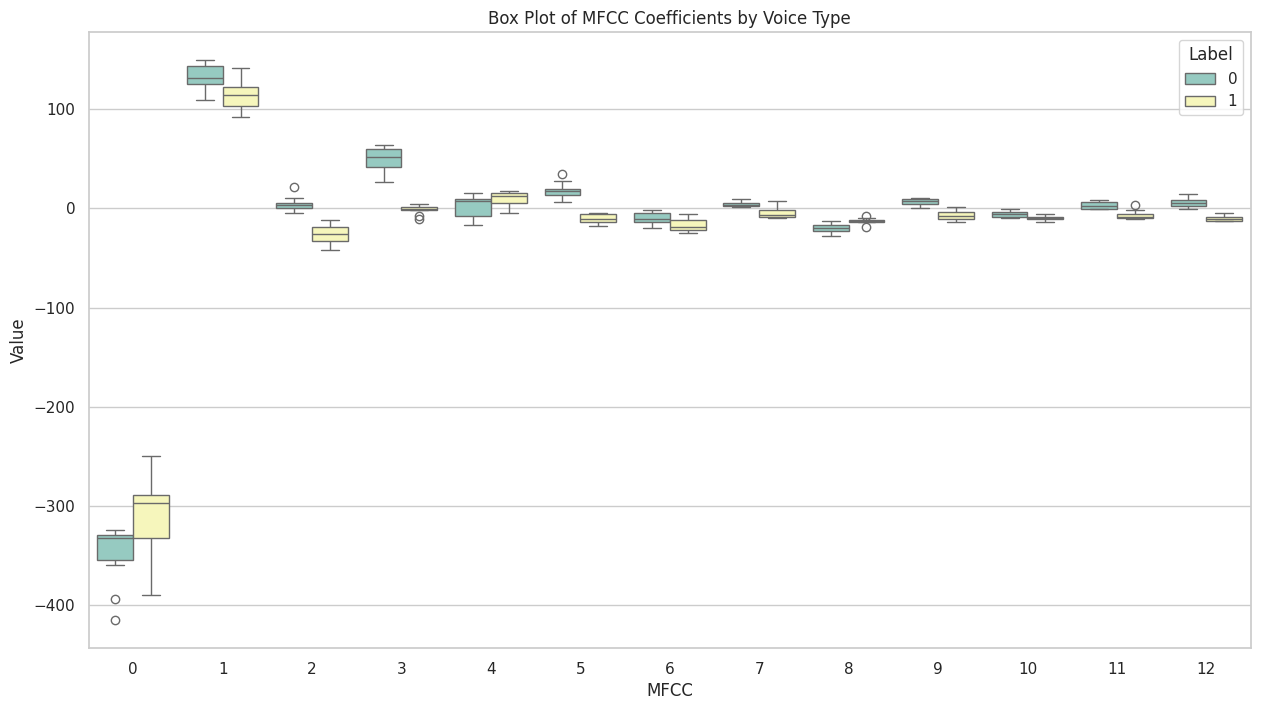

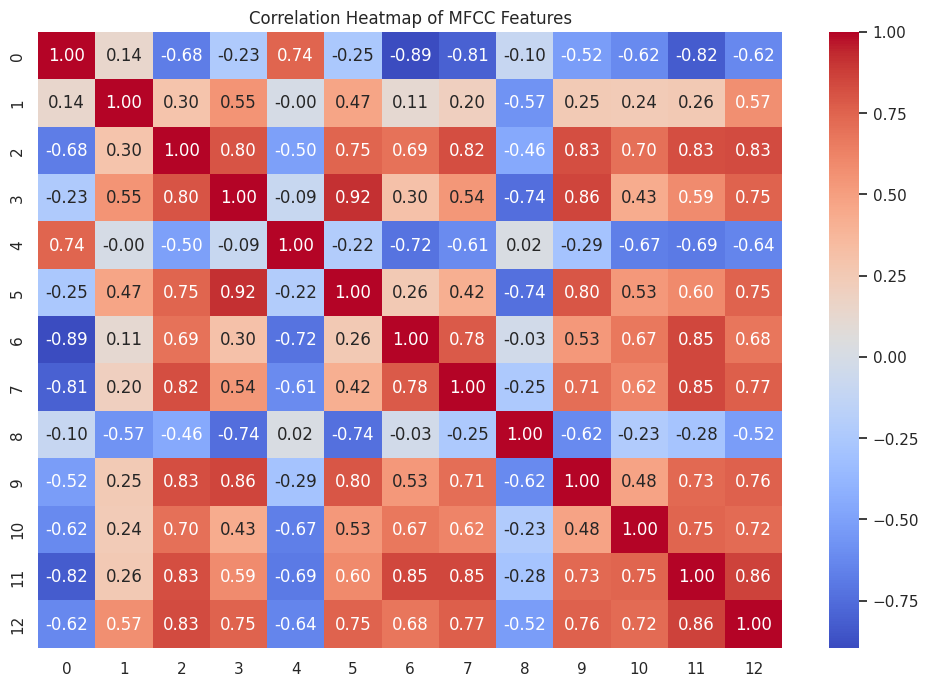

In [ ]:
import seaborn as sns
import scipy.stats as stats

# Calculate the standard deviation for each MFCC coefficient
mfcc_std = mfcc_df.groupby('Label').std()
print("Standard Deviation of MFCCs:")
print(mfcc_std)

# Perform t-tests between normal and pathological MFCCs
t_test_results = {}
for i in range(mfcc_df.shape[1] - 1):  # Exclude the label column
    normal_mfcc = mfcc_df[mfcc_df['Label'] == 0].iloc[:, i]
    pathological_mfcc = mfcc_df[mfcc_df['Label'] == 1].iloc[:, i]
    t_stat, p_value = stats.ttest_ind(normal_mfcc, pathological_mfcc)
    t_test_results[f'MFCC {i}'] = {'t-statistic': t_stat, 'p-value': p_value}

# Display t-test results
t_test_df = pd.DataFrame(t_test_results).T
print("\nT-Test Results:")
print(t_test_df)

# Visualization: Box Plots of MFCCs
plt.figure(figsize=(15, 8))
sns.boxplot(data=mfcc_df.melt(id_vars='Label', var_name='MFCC', value_name='Value'),
            x='MFCC', y='Value', hue='Label', palette='Set3')
plt.title('Box Plot of MFCC Coefficients by Voice Type')
plt.show()

# Correlation heatmap of MFCC features
plt.figure(figsize=(12, 8))
sns.heatmap(mfcc_df.iloc[:, :-1].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of MFCC Features')
plt.show()


In [ ]:
# Descriptive Statistics
descriptive_stats = mfcc_df.groupby('Label').agg(['mean', 'median', 'std', 'min', 'max',
                                                    lambda x: np.percentile(x, 75) - np.percentile(x, 25)])  # IQR
# Flatten MultiIndex Columns
descriptive_stats.columns = ['_'.join(map(str, col)).strip() for col in descriptive_stats.columns.values]
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
           0_mean    0_median      0_std       0_min       0_max  \
Label                                                              
0     -347.991089 -332.076355  31.718225 -414.985168 -324.583984   
1     -309.616180 -297.089722  47.586712 -389.849884 -249.619492   

       0_<lambda_0>      1_mean    1_median      1_std       1_min  ...  \
Label                                                               ...   
0         24.993164  132.078369  131.241257  13.024055  109.310188  ...   
1         42.858070  113.490112  114.247635  15.285955   91.538666  ...   

         11_std     11_min    11_max  11_<lambda_0>    12_mean  12_median  \
Label                                                                       
0      3.786962  -1.012297  8.271033       7.064045   5.731063   5.551369   
1      4.623288 -10.909219  2.917563       4.842106 -10.394094 -10.710783   

         12_std     12_min     12_max  12_<lambda_0>  
Label                                 

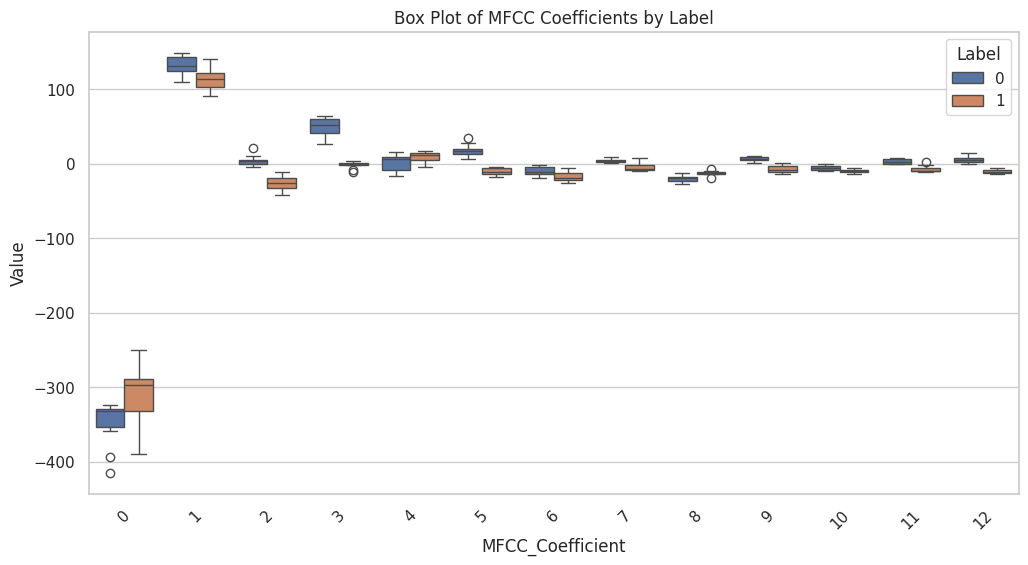

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the DataFrame for plotting
mfcc_long = mfcc_df.melt(id_vars=['Label'], var_name='MFCC_Coefficient', value_name='Value')

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='MFCC_Coefficient', y='Value', hue='Label', data=mfcc_long)
plt.title('Box Plot of MFCC Coefficients by Label')
plt.xticks(rotation=45)
plt.show()


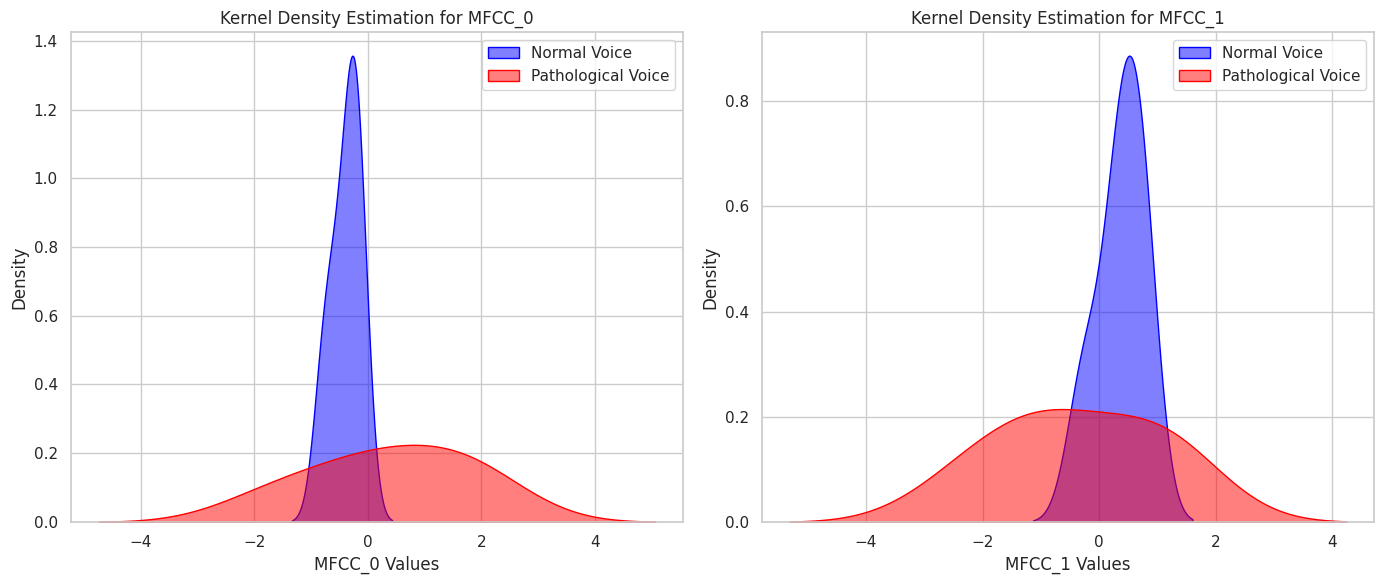

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample DataFrame with MFCC coefficients (replace this with your actual DataFrame)
data = {
    'Label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    'MFCC_0': np.random.normal(-350, 30, 5).tolist() + np.random.normal(-310, 50, 5).tolist(),
    'MFCC_1': np.random.normal(130, 15, 5).tolist() + np.random.normal(110, 20, 5).tolist(),
}
mfcc_df = pd.DataFrame(data)

# Standardizing the data (optional but recommended)
scaler = StandardScaler()
scaled_mfcc = scaler.fit_transform(mfcc_df.drop('Label', axis=1))
scaled_mfcc_df = pd.DataFrame(scaled_mfcc, columns=mfcc_df.columns[1:])
scaled_mfcc_df['Label'] = mfcc_df['Label'].values

# Set the style for seaborn
sns.set(style='whitegrid')

# Plotting Kernel Density Estimates for MFCC Coefficients
plt.figure(figsize=(14, 6))

for i in range(2):  # Iterate over the MFCC coefficients (0 and 1 in this case)
    plt.subplot(1, 2, i + 1)  # Create subplots
    sns.kdeplot(data=scaled_mfcc_df[scaled_mfcc_df['Label'] == 0][f'MFCC_{i}'],
                 label='Normal Voice', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(data=scaled_mfcc_df[scaled_mfcc_df['Label'] == 1][f'MFCC_{i}'],
                 label='Pathological Voice', fill=True, alpha=0.5, color='red')

    plt.title(f'Kernel Density Estimation for MFCC_{i}')
    plt.xlabel(f'MFCC_{i} Values')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
